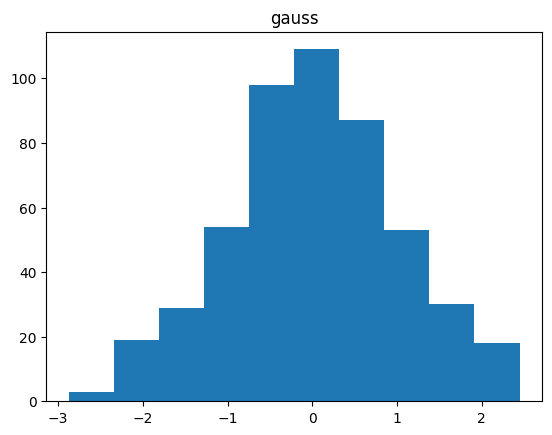

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import gauss 

l= [ gauss(0,1) for i in range(500)]
plt.figure
plt.hist(l)
plt.title("gauss")
plt.show()


In [23]:
!curl -o GLT_filterd.csv https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  7 12.1M    7  958k    0     0  1390k      0  0:00:08 --:--:--  0:00:08 1391k
100 12.1M  100 12.1M    0     0  9005k      0  0:00:01  0:00:01 --:--:-- 9021k


In [24]:
import csv 

db= [[],[],[],[],[],[]]

with open("GLT_filterd.csv") as f:
    reader=csv.reader(f)
    header=next(reader)
    for rows in reader:
        for j in range(6):
            db[j].append(rows[j])
print(db[1][:10])

db[1]=[float(x) if x!='' else '' for x in db[1] ]


['26.704', '27.434', '', '26.14', '25.427', '24.844', '24.058000000000003', '23.576', '', '25.263']


In [25]:
def preceding(values, i):
    preceding=0
    if(values[i-1]!=''):
        preceding=values[i-1]
    else:
        for j in range(i):
            if(values[i-j]!=''):
                preceding=values[i-j]
                break
    return preceding

def succesive(values,i):
     succesive=0
     if(values[i+1]!=''):
            succesive=values[i+1]
     else:
        for j in range(len(values)-i):
            if(values[i+j]!=''):
                succesive=values[i+j]
                break
     return succesive



def missing_value_correction(values):

    for i in range(len(values)):
        if values[i] == '':
            if i == 0:
                prev_value = 0
                next_value = succesive(values, i)
            
            elif i == len(values) - 1:
                prev_value = preceding(values, i)
                next_value = 0

            else:
                prev_value = preceding(values, i)
                next_value = succesive(values, i)

            values[i] = (prev_value + next_value) / 2  # Fill missing value

   
    print("withoutmissing",values[0:20])
    
    


In [26]:
temp=[]
cities= list(set(db[3]))
print(cities)
for z in range(len(cities)):
    v= [x for k, x in enumerate(db[1]) if db[3][k]==cities[z]] 
    temp.append(v)
    print("with missing value",v[:20])
    missing_value_correction(v)
    i=0
    for o ,m in enumerate(db[1]):
        if db[3][o]==cities[z]:
            db[1][o]=v[i]
            i+=1;
    print(cities[z])

print("db",db[1][:20])
    

['Moscow', 'Calcutta', 'Kinshasa', 'Jiddah', 'Salvador', 'Shenyang', 'Rio De Janeiro', 'Chengdu', 'Peking', 'Delhi', 'Luanda', 'Alexandria', 'Madras', 'Ho Chi Minh City', 'Wuhan', 'Montreal', 'Lakhnau', 'Jakarta', 'Ahmadabad', 'Taipei', 'Harare', 'Cali', 'Chongqing', 'Manila', 'Jaipur', 'Shanghai', 'Istanbul', 'Umm Durman', 'Fortaleza', 'BrasÃ\xadlia', 'Hyderabad', 'Toronto', 'Nanjing', 'Lagos', 'Ibadan', 'Los Angeles', 'Kabul', 'Bangalore', 'Tangshan', 'Karachi', 'Xian', 'Dar Es Salaam', 'Durban', 'Guangzhou', 'Sydney', 'Lima', 'Saint Petersburg', 'Riyadh', 'Baghdad', 'Tianjin', 'Nagoya', 'Chicago', 'New York', 'Harbin', 'Mashhad', 'Abidjan', 'Dakar', 'Rangoon', 'Changchun', 'Mexico', 'SÃ£o Paulo', 'Bombay', 'Santo Domingo', 'Lahore', 'London', 'Melbourne', 'Casablanca', 'Gizeh', 'Surat', 'Madrid', 'Jinan', 'Santiago', 'Cairo', 'Paris', 'Izmir', 'Dalian', 'Bangkok', 'Aleppo', 'Mogadishu', 'Belo Horizonte', 'Surabaya', 'Pune', 'Singapore', 'Kano', 'Taiyuan', 'New Delhi', 'Nagpur', 'Cap

In [27]:
cityTempDict= {cities[i] : temp[i] for i in range(len(cities))}
print(cityTempDict.keys())

def topN(city,n):
    if(n>=0):
        hottest = sorted(cityTempDict[city], reverse=True)[:n]  # Top N hottest temperatures
        coldest = sorted(cityTempDict[city])[:n] 
        print(hottest,coldest)
    

topN("Bangkok",10)
topN("Rome",10)
    

dict_keys(['Moscow', 'Calcutta', 'Kinshasa', 'Jiddah', 'Salvador', 'Shenyang', 'Rio De Janeiro', 'Chengdu', 'Peking', 'Delhi', 'Luanda', 'Alexandria', 'Madras', 'Ho Chi Minh City', 'Wuhan', 'Montreal', 'Lakhnau', 'Jakarta', 'Ahmadabad', 'Taipei', 'Harare', 'Cali', 'Chongqing', 'Manila', 'Jaipur', 'Shanghai', 'Istanbul', 'Umm Durman', 'Fortaleza', 'BrasÃ\xadlia', 'Hyderabad', 'Toronto', 'Nanjing', 'Lagos', 'Ibadan', 'Los Angeles', 'Kabul', 'Bangalore', 'Tangshan', 'Karachi', 'Xian', 'Dar Es Salaam', 'Durban', 'Guangzhou', 'Sydney', 'Lima', 'Saint Petersburg', 'Riyadh', 'Baghdad', 'Tianjin', 'Nagoya', 'Chicago', 'New York', 'Harbin', 'Mashhad', 'Abidjan', 'Dakar', 'Rangoon', 'Changchun', 'Mexico', 'SÃ£o Paulo', 'Bombay', 'Santo Domingo', 'Lahore', 'London', 'Melbourne', 'Casablanca', 'Gizeh', 'Surat', 'Madrid', 'Jinan', 'Santiago', 'Cairo', 'Paris', 'Izmir', 'Dalian', 'Bangkok', 'Aleppo', 'Mogadishu', 'Belo Horizonte', 'Surabaya', 'Pune', 'Singapore', 'Kano', 'Taiyuan', 'New Delhi', 'Nag

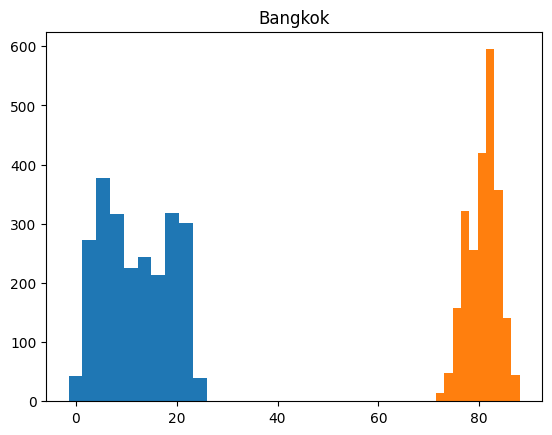

In [28]:

def plothist(cities):
    plt.figure()
    for city in cities:    
        plt.hist(cityTempDict[city])  
    plt.title(city)
    plt.show()
plothist(["Rome","Bangkok"])


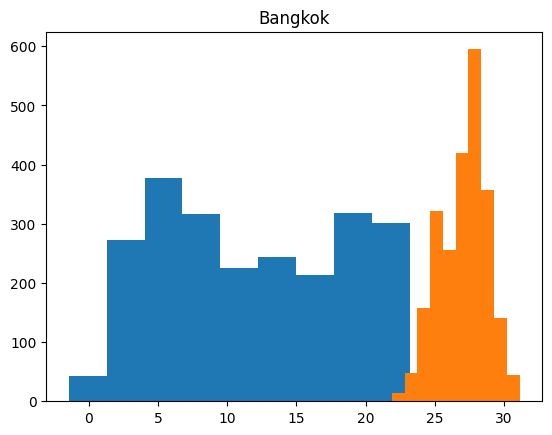

In [29]:
# farehnite to celsius

for i in range(len(cityTempDict["Bangkok"])):
    cityTempDict["Bangkok"][i]= (cityTempDict["Bangkok"][i]-32)/1.8


plothist(["Rome", "Bangkok"])

In [30]:
# exercise 2

!curl -o "IMDB.csv" https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 10 31.7M   10 3376k    0     0  2286k      0  0:00:14  0:00:01  0:00:13 2287k
 62 31.7M   62 19.8M    0     0  8199k      0  0:00:03  0:00:02  0:00:01 8200k
100 31.7M  100 31.7M    0     0   9.8M      0  0:00:03  0:00:03 --:--:--  9.8M


In [36]:
imdb_db=[[],[]]

with open("IMDB.csv",encoding="utf-8") as f:
    reader=csv.reader(f)
    header=next(reader)
    for cols in reader:
        for j in range(2):
            imdb_db[j].append(cols[j])

print(imdb_db[1][:10])

['1', '0', '1', '0', '1', '0', '1', '0', '1', '0']


In [40]:
#tokenisation

import string

def tokenisation(docs):
    tokens=[]
    for doc in docs:
        for punc in string.punctuation:
            doc= doc.replace(punc," ")
        token=[ word.lower() for word in doc.split(" ") if word]
        tokens.append(token)
    return tokens

imdb_db[0]=tokenisation(imdb_db[0])
print(imdb_db[0][:5])

[['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt'], ['working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', 'this', 'film', 'manages', 'to', 'be', 'creditable', 'to', 'it', 's', 'source', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience', 'br', 'br', 'branagh', 'steals', 'the', 'film', 'from', 'under', 'fishburne', 's', 'nose', 'and', 'there', 's', 'a', 'talented', 'cast', 'on', 'good', 'form'], ['bizarre', 'horror', 'movie', 'filled', 'with', 'famous', 'faces', 'but', 'stolen', 'by', 'cristina', 'raines', 'later', 'of', 'tv', 's', 'flamingo', 'road', 'as', 'a', 'pretty', 'but',

In [ ]:
def tf(tokens):
    p_list=[]
    for i in range(len(tokens)):
        new={}
        for j in range(len(tokens[i])):
            if(tokens[i][j] not in new):
                counter=1
                for l in range(len(tokens[i])):
                    if ( ((l+j+1)<len(tokens[i])) and (tokens[i][l+j+1] == tokens[i][j]) ):
                        counter+=1
                new[tokens[i][j]] = counter
        p_list.append(new)
    return p_list


list=tf(imdb_db[0])
print(list[0])


            


{'for': 3, 'a': 5, 'movie': 2, 'that': 1, 'gets': 1, 'no': 1, 'respect': 1, 'there': 1, 'sure': 1, 'are': 1, 'lot': 1, 'of': 1, 'memorable': 1, 'quotes': 1, 'listed': 1, 'this': 1, 'gem': 1, 'imagine': 1, 'where': 1, 'joe': 1, 'piscopo': 1, 'is': 3, 'actually': 1, 'funny': 1, 'maureen': 1, 'stapleton': 1, 'scene': 1, 'stealer': 1, 'the': 2, 'moroni': 1, 'character': 1, 'an': 1, 'absolute': 1, 'scream': 1, 'watch': 1, 'alan': 1, 'skipper': 1, 'hale': 1, 'jr': 1, 'as': 1, 'police': 1, 'sgt': 1}


In [ ]:
#test 
c=0
for i, j in list[0].items():
    c+=j

print(c)
print(len(imdb_db[0][0]))

# test list

l=[["the", "the","as","a","i","as"],["as", "a"]]
test=tf(l)
print(test[1])
print(len(l[0]))



52
52
{'as': 1, 'a': 1}
6
